# **M9. Tarea 1 - Python**
## **1. Cargar un dataframe desde una url**
### **0) Pasos previos (FBref) y preparación del entorno en VS Code**

En esta tarea se trabajará con datos obtenidos desde la web (FBref).
Antes de cargar el dataframe con Python, se realiza una verificación previa de la fuente para asegurar que la tabla es accesible y que su estructura (columnas/cabeceras) es la esperada.

### **0.1. Acceder a la página web de FBref**

1. Se accede a la página de FBref donde se encuentra la tabla objetivo (estadísticas de jugadores/equipos).

2. Se comprueba visualmente que la tabla está disponible y contiene los campos necesarios para el análisis.

Fuente de datos:

https://fbref.com/en/comps/9/stats/Premier-League-Stats

### **0.2. Guardar la página web localmente**

1. Con la página abierta, se guarda una **copia local** mediante Ctrl + S.

2. Se selecciona la opción **“Página web, completa”**.

3. Se almacena el archivo **.html** en la carpeta del proyecto.

Este guardado local permite inspeccionar la estructura de la tabla y conservar una referencia del contenido en caso de cambios en la web.






## **1) Importación de librerías**

Para la obtención de datos desde una página web se utiliza **pandas.read_html()**, que permite extraer tablas HTML directamente desde una URL o desde un archivo HTML guardado localmente.

El procedimiento aplicado es:

1. Definir la fuente (URL o HTML local).

2. Leer todas las tablas disponibles (lista de dataframes).

3. Seleccionar la tabla correcta.

4. Realizar una limpieza básica (si procede).

5. Verificar la carga del dataframe.

In [73]:
# Primero importamos la librería con su alias estándar 'pd'
import pandas as pd
import numpy as np

# Fuente (HTML guardado con Ctrl+S desde FBref)
url = "Premier_League_Player_Stats _ FBref.com.html"

# Leer todas las tablas del HTML
tablas = pd.read_html(url)

# Comprobación del número de tablas
for i, t in enumerate(tablas[:10]):
    print(f"Tabla {i} -> {t.shape}")

# Seleccionamos la tabla correcta
df = tablas[0]

# Aplanar columnas si existe MultiIndex
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(-1)

# Eliminar columnas auxiliares tipo "Unnamed"
df = df.loc[:, ~df.columns.astype(str).str.contains("Unnamed")]

# Eliminar el numero limitado de columnas que se visualizan
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)




Tabla 0 -> (20, 32)
Tabla 1 -> (20, 32)


## **2. Análisis y manipulación del DataFrame**

En este apartado se trabaja con el dataframe obtenido en el punto 1 aplicando funciones de exploración, análisis descriptivo y limpieza de datos:
* Visualización **inicial de registros**
* Revisión de **tipos de datos**
* Distribución de valores con **`value_counts()`**
* Estadística descriptiva con **`describe()`**
* Tratamiento de **valores nulos (NaN)**
* Eliminación de **duplicados**
* Obtención de un **Top 25** mediante ordenación



### **2.a) Mostrar las 5 primeras filas (head())**

In [74]:
df.head()


,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG
0,Arsenal,24,26.5,57.8,21,231,1890,21.0,37,27,64,34,3,3,29,0,35.8,33.5,23.9,57.4,453,938,1.76,1.29,3.05,1.62,2.90,1.71,1.14,2.85,1.59,2.73
1,Aston Villa,26,28.4,52.8,21,231,1890,21.0,32,24,56,32,0,0,32,1,25.0,25.0,18.9,43.9,293,749,1.52,1.14,2.67,1.52,2.67,1.19,0.90,2.09,1.19,2.09
2,Bournemouth,24,25.7,50.5,21,231,1890,21.0,34,18,52,32,2,3,51,1,32.0,29.7,18.5,48.2,392,800,1.62,0.86,2.48,1.52,2.38,1.53,0.88,2.41,1.41,2.29
3,Brentford,22,25.7,46.4,21,231,1890,21.0,34,21,55,29,5,7,41,0,33.8,28.3,22.7,51.0,256,612,1.62,1.00,2.62,1.38,2.38,1.61,1.08,2.69,1.35,2.43
4,Brighton,26,25.9,51.8,21,231,1890,21.0,30,17,47,27,3,5,55,0,32.7,28.9,21.6,50.5,423,767,1.43,0.81,2.24,1.29,2.10,1.56,1.03,2.59,1.38,2.41


### **2.b) Listar columnas y tipos de datos (info())**

In [75]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Squad     20 non-null     object 
 1   # Pl      20 non-null     int64  
 2   Age       20 non-null     float64
 3   Poss      20 non-null     float64
 4   MP        20 non-null     int64  
 5   Starts    20 non-null     int64  
 6   Min       20 non-null     int64  
 7   90s       20 non-null     float64
 8   Gls       20 non-null     int64  
 9   Ast       20 non-null     int64  
 10  G+A       20 non-null     int64  
 11  G-PK      20 non-null     int64  
 12  PK        20 non-null     int64  
 13  PKatt     20 non-null     int64  
 14  CrdY      20 non-null     int64  
 15  CrdR      20 non-null     int64  
 16  xG        20 non-null     float64
 17  npxG      20 non-null     float64
 18  xAG       20 non-null     float64
 19  npxG+xAG  20 non-null     float64
 20  PrgC      20 non-null     int64  


#### **Análisis de la estructura**
**1. Tipo de datos:** El DataFrame representa las estadísticas de los 20 equipos de la Premier League (20 filas).

**2. Dimensiones:** Consta de 32 columnas, lo que indica un análisis profundo que incluye métricas básicas y avanzadas.

**3. Calidad:** No existen valores nulos (20 non-null en todas las columnas), por lo que el dataset está limpio y completo.

**4. Variables:** 

* Cualitativas: 1 (Squad).

* Cuantitativas: 31 (repartidas entre enteros y decimales).

**5. Observación técnica:** Se detectan columnas con nombres duplicados (como Gls y xG). Esto ocurre porque la tabla mezcla totales de temporada con promedios "por cada 90 minutos".

In [76]:
df.columns

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls', 'Ast', 'G+A', 'G-PK',
       'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG'],
      dtype='object')

Algunas métricas aparecen duplicadas en el DataFrame debido a la coexistencia de estadísticas totales y estadísticas normalizadas por 90 minutos. 
Para evitar ambigüedades en el análisis, se renombran las columnas correspondientes a métricas por 90 minutos añadiendo el sufijo `/90`.


In [77]:
from collections import defaultdict

# Inicializa un contador para identificar y renombrar columnas con nombres duplicados.
contador = defaultdict(int)
nuevas_columnas = []

# Recorre las columnas: la primera aparición mantiene el nombre original, las siguientes se marcan como estadísticas por 90 minutos.
for col in df.columns:
    if contador[col] == 0:
        nuevas_columnas.append(col)
    else:
        nuevas_columnas.append(f"{col}/90")
    contador[col] += 1

# Aplica los nuevos nombres únicos al DataFrame para evitar conflictos en el análisis.
df.columns = nuevas_columnas


In [78]:
df.columns

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls/90', 'Ast/90', 'G+A/90',
       'G-PK/90', 'G+A-PK', 'xG/90', 'xAG/90', 'xG+xAG', 'npxG/90',
       'npxG+xAG/90'],
      dtype='object')

### **2.c) `Uso value_counts()` sobre una columna a elección**

En este apartado se utiliza la función **`value_counts()`** sobre la columna **# Pl**, que representa el **número de jugadores en plantilla** de cada equipo, con el objetivo de analizar su distribución entre los clubes de la Premier League.


In [79]:
df["# Pl"].value_counts()


# Pl
26    5
25    4
23    4
24    3
22    1
20    1
27    1
30    1
Name: count, dtype: int64

#### Análisis de value_counts() sobre "# Pl"
El análisis de la columna **# Pl** (número de jugadores) muestra la rotación de los equipos:

* **Tendencia central:** La mayoría de los clubes (16 de 20) utilizan entre 23 y 26 jugadores, siendo 26 el valor más frecuente (5 equipos).

* **Extremos:** Se observa un equipo con una plantilla muy corta de 20 jugadores y otro con una rotación máxima de 30 jugadores.

* **Conclusión:** La Premier League presenta plantillas estables, donde lo más común es competir con 25 o 26 futbolistas a lo largo de la temporada

### **2.d) Análisis descriptivo (describe())**

In [80]:
cols_describe = ["Gls", "Ast", "G+A", "xG", "xAG"]
df[cols_describe].describe()



,Gls,Ast,G+A,xG,xAG
count,20.000000,20.000000,20.00000,20.000000,20.000000
mean,28.150000,18.650000,46.80000,28.430000,19.775000
std,7.227688,5.993637,12.75931,6.927831,5.533332
min,14.000000,9.000000,23.00000,17.900000,11.700000
25%,21.000000,13.750000,35.50000,23.075000,16.825000
50%,29.500000,18.500000,48.00000,30.250000,18.700000
75%,34.000000,23.000000,55.25000,33.350000,23.000000
max,42.000000,33.000000,75.00000,39.600000,32.300000


En la tabla resultante del método **`describe()`**, las filas representan estadísticos descriptivos de las variables numéricas:

- **`count`:** número de observaciones (20 equipos).
- **`mean`:** valor medio de cada métrica.
- **`std`:** desviación estándar, que indica la dispersión de los datos.
- **`min` y `max`:** valores mínimo y máximo.
- **`25%`, `50%` y `75%`:** cuartiles de la distribución.

Estos estadísticos permiten analizar la variabilidad y el comportamiento general de las métricas ofensivas de los equipos.


### **2.e) Trabajar valores NaN (isna)**

Se comprueba la existencia de valores nulos (NaN) por columna y el porcentaje de nulos respecto al total de filas.

In [81]:
# Calcula el número total de valores nulos (NaN) en el dataset para determinar si se requiere limpieza o imputación.
total_nan = int(df.isna().sum().sum())
print("Total de NaN en el DataFrame:", total_nan)

# Evalúa la necesidad de tratamiento de datos según la presencia de valores faltantes.
if total_nan == 0:
    print(" No se detectan valores NaN. No es necesario aplicar tratamiento.")
else:
    print(" Se detectan valores NaN. Se requiere tratamiento (imputación/eliminación).")



Total de NaN en el DataFrame: 0
 No se detectan valores NaN. No es necesario aplicar tratamiento.


### **2.f) Eliminar duplicados (drop_duplicates)**

Se comprueba la existencia de filas duplicadas y, en caso de existir, se eliminan del DataFrame.


In [82]:
# Cuantifica y elimina las filas duplicadas del DataFrame para asegurar que cada registro sea único.
filas_antes = df.shape[0]
duplicados_detectados = int(df.duplicated().sum())

# Aplica la limpieza eliminando las repeticiones y actualiza el conteo final de registros.
df = df.drop_duplicates()
filas_despues = df.shape[0]

# Muestra el balance final de la limpieza de datos.
print("Filas antes:", filas_antes)
print("Filas después:", filas_despues)
print("Duplicados detectados:", duplicados_detectados)
print("Duplicados eliminados:", filas_antes - filas_despues)


Filas antes: 20
Filas después: 20
Duplicados detectados: 0
Duplicados eliminados: 0


### **2.g) Top 20 de equipos según goles anotados y goles esperados (xG)**

En este apartado se obtiene el Top 20 de equipos de la Premier League de lo que llevamos en la **temporada 25/26** ordenados según:
- Goles anotados (`Gls`)
- Goles esperados (`xG`)

Dado que el dataset contiene información de 20 equipos, el Top 20 incluye a todos los equipos de la competición, ordenados de mayor a menor valor.


#### **Top 20 goles totales**

In [83]:
# Obtiene los 20 máximos goleadores y filtra sus estadísticas clave para comparar goles reales vs. esperados (xG).
top20_goles = df.sort_values(by="Gls", ascending=False).head(20)

# Muestra una tabla comparativa de efectividad por jugador y equipo.
top20_goles[["Squad", "Gls", "xG"]]



,Squad,Gls,xG
12,Manchester City,42,39.6
0,Arsenal,37,35.8
3,Brentford,34,33.8
2,Bournemouth,34,32.0
13,Manchester Utd,34,37.7
6,Chelsea,34,36.8
1,Aston Villa,32,25.0
14,Newcastle Utd,32,31.0
11,Liverpool,31,31.9
4,Brighton,30,32.7


In [84]:
# Filtra los 20 jugadores con mayor expectativa de gol por cada 90 minutos para analizar la peligrosidad ofensiva constante.
top20_xg90 = df.sort_values(by="xG/90", ascending=False).head(20)

# Compara la generación de ocasiones esperadas (xG/90) frente a la eficacia goleadora real (Gls/90).
top20_xg90[["Squad", "xG/90", "Gls/90"]]


,Squad,xG/90,Gls/90
12,Manchester City,1.88,2.00
13,Manchester Utd,1.79,1.62
6,Chelsea,1.75,1.62
0,Arsenal,1.71,1.76
3,Brentford,1.61,1.62
7,Crystal Palace,1.58,1.00
4,Brighton,1.56,1.43
2,Bournemouth,1.53,1.62
11,Liverpool,1.52,1.48
14,Newcastle Utd,1.48,1.52


El análisis comparativo entre goles anotados (Gls) y goles esperados (xG) muestra diferencias claras en la eficacia ofensiva de los equipos. 
Tottenham y Aston Villa destacan por convertir muy por encima de lo esperado, mientras que Crystal Palace, Manchester United y Chelsea presentan una baja eficacia pese a generar un alto volumen de ocasiones. 
Manchester City y Arsenal combinan un elevado volumen ofensivo con una conversión acorde a su xG, mostrando un rendimiento ofensivo equilibrado.


## **3. Análisis exploratorio y extracción de información**
### **0) Importar librerías y cargar el CSV**

In [85]:
# Se obtiene el archivo CSV de forma local
df = pd.read_csv("fbref_laliga21.csv")
# Eliminar el numero limitado de columnas que se visualizan
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
# Se extraen las primeras columas para ver el resultado de la extracción

df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches
0,1,Sabit Abdulai\Sabit-Abdulai,gh GHA,MF,Getafe,21,1999,3,0,60,0.7,0,0,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
1,2,Marcos Acuña\Marcos-Acuna,ar ARG,DF,Sevilla,28,1991,30,26,2330,25.9,1,2,1,0,0,5,0,0.04,0.08,0.12,0.04,0.12,1.1,1.1,2.8,4.0,0.04,0.11,0.15,0.04,0.15,Matches
2,3,Bobby Adekanye\Bobby-Adekanye,nl NED,FWMF,Cádiz,21,1999,3,0,36,0.4,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.2,0.2,0.0,0.2,0.43,0.00,0.43,0.43,0.43,Matches
3,4,Martin Agirregabiria\Martin-Agirregabiria,es ESP,DFMF,Alavés,24,1996,26,16,1558,17.3,0,1,0,0,0,1,0,0.00,0.06,0.06,0.00,0.06,0.2,0.2,0.9,1.1,0.01,0.05,0.06,0.01,0.06,Matches
4,5,Joseph Aidoo\Joseph-Aidoo,gh GHA,DF,Celta Vigo,24,1995,25,14,1289,14.3,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00,0.8,0.8,0.6,1.4,0.06,0.04,0.10,0.06,0.10,Matches


En la muestra se observa que se puede limpiar o mejorar la tabla.

Cambios propuestos a mejorar:

* Limpiar el nombre del jugador

* Limpiar la columna 'Nation'

* Eliminar la columna 'Rk'

In [86]:
import pandas as pd

df = pd.read_csv("fbref_laliga21.csv")

# 1. Limpiar el nombre del jugador (quitar lo que sigue a la \)
df['Player'] = df['Player'].str.split('\\').str[0]

# 2. Limpiar la columna 'Nation' (quitar el prefijo en minúsculas y quedar con GHA, ESP, etc.)
# Usamos split y nos quedamos con el último elemento de la lista
df['Nation'] = df['Nation'].str.split(' ').str[-1]

# 3. Limpiar la columna 'Pos' para dejar solo la posición principal
# Esto selecciona el rango de caracteres desde el índice 0 hasta el 2 (no incluido)
df['Pos'] = df['Pos'].str[:2]

# 4. Renombrar columnas clave para mayor claridad
df = df.rename(columns={
    'Gls.1': 'Gls/90',
    'Ast.1': 'Ast/90',
    'xG.1': 'xG/90',
    'xA.1': 'xA/90',
    'xG+xA': 'xG+xA/90',
    'npxG.1': 'npxG/90',
    'npxG+xA.1' : 'npxG+xA/90'
})

df.head()


,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls/90,Ast/90,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG/90,xA/90,xG+xA/90,npxG/90,npxG+xA/90,Matches
0,1,Sabit Abdulai,GHA,MF,Getafe,21,1999,3,0,60,0.7,0,0,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
1,2,Marcos Acuña,ARG,DF,Sevilla,28,1991,30,26,2330,25.9,1,2,1,0,0,5,0,0.04,0.08,0.12,0.04,0.12,1.1,1.1,2.8,4.0,0.04,0.11,0.15,0.04,0.15,Matches
2,3,Bobby Adekanye,NED,FW,Cádiz,21,1999,3,0,36,0.4,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.2,0.2,0.0,0.2,0.43,0.00,0.43,0.43,0.43,Matches
3,4,Martin Agirregabiria,ESP,DF,Alavés,24,1996,26,16,1558,17.3,0,1,0,0,0,1,0,0.00,0.06,0.06,0.00,0.06,0.2,0.2,0.9,1.1,0.01,0.05,0.06,0.01,0.06,Matches
4,5,Joseph Aidoo,GHA,DF,Celta Vigo,24,1995,25,14,1289,14.3,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00,0.8,0.8,0.6,1.4,0.06,0.04,0.10,0.06,0.10,Matches


### **a) Seleccionar columnas con .loc[]**
Columnas pedidas:

* 'Player'

* 'Squad'

* 'Gls/90'

* 'Ast/90'

* 'xG/90'

* 'xA/90'

In [87]:
#Antes de de seleccionar las columnas vamos a ver los nommbres de las columnas
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR',
       'Gls/90', 'Ast/90', 'G+A', 'G-PK.1', 'G+A-PK', 'xG', 'npxG', 'xA',
       'npxG+xA', 'xG/90', 'xA/90', 'xG+xA/90', 'npxG/90', 'npxG+xA/90',
       'Matches'],
      dtype='object')

Se observa que algunas columnas pedidas se encuentran con otro nombre distinto, se debe de cambiar el nombre para poder obnerlo con el nombre requerido.

In [88]:
# Renombramos las columnas con nombres más claros
df = df.rename(columns={
    'Gls.1': 'Gls/90',
    'Ast.1': 'Ast/90',
    'xG.1': 'xG/90',
    'xA.1': 'xA/90'
})

In [89]:
cols = ['Player', 'Squad', 'Gls/90', 'Ast/90', 'xG/90', 'xA/90']
df_loc = df.loc[:, cols]
df_loc.head()

,Player,Squad,Gls/90,Ast/90,xG/90,xA/90
0,Sabit Abdulai,Getafe,0.00,0.00,0.00,0.00
1,Marcos Acuña,Sevilla,0.04,0.08,0.04,0.11
2,Bobby Adekanye,Cádiz,0.00,0.00,0.43,0.00
3,Martin Agirregabiria,Alavés,0.00,0.06,0.01,0.05
4,Joseph Aidoo,Celta Vigo,0.00,0.00,0.06,0.04


### **b) Obtener únicamente el nombre de los equipos**

In [90]:
equipos = df['Squad'].unique()
equipos

array(['Getafe', 'Sevilla', 'Cádiz', 'Alavés', 'Celta Vigo', 'Betis',
       'Elche', 'Barcelona', 'Villarreal', 'Valladolid', 'Eibar',
       'Athletic Club', 'Granada', 'Real Sociedad', 'Real Madrid',
       'Osasuna', 'Levante', 'Valencia', 'Huesca', 'Atlético Madrid'],
      dtype=object)

In [91]:
# Los equipos ordenados
equipos_ordenados = sorted(equipos)
equipos_ordenados

['Alavés',
 'Athletic Club',
 'Atlético Madrid',
 'Barcelona',
 'Betis',
 'Celta Vigo',
 'Cádiz',
 'Eibar',
 'Elche',
 'Getafe',
 'Granada',
 'Huesca',
 'Levante',
 'Osasuna',
 'Real Madrid',
 'Real Sociedad',
 'Sevilla',
 'Valencia',
 'Valladolid',
 'Villarreal']

### **c) Datos del Atlético de Madrid con .loc[]**
Columnas:

* 'Player'

* 'Gls'

* 'xG'

* 'Gls/90'

* 'xG/90'

In [92]:
# Definimos las columnas que vamos a utilizar
cols_atm = ['Player', 'Gls', 'xG', 'Gls/90', 'xG/90']

# Filtra todos los jugadores del Atlético de Madrid y muestra el DataFrame completo
atm = df.loc[df['Squad'] == 'Atlético Madrid', cols_atm]

# Al poner solo el nombre, se muestran todas las filas filtradas
atm  

,Player,Gls,xG,Gls/90,xG/90
92,Yannick Carrasco,6,6.0,0.25,0.25
112,Ángel Correa,9,7.6,0.34,0.29
115,Diego Costa,2,1.4,0.87,0.60
124,Moussa Dembélé,0,1.0,0.00,0.92
161,Felipe,0,0.9,0.00,0.04
162,João Félix,7,5.1,0.40,0.29
227,Mario Hermoso,1,1.2,0.03,0.04
229,Héctor Herrera,0,0.2,0.00,0.03
274,Koke,1,1.9,0.03,0.06
276,Geoffrey Kondogbia,0,0.2,0.00,0.02


### **d) Solo delanteros del Atlético de Madrid**

In [ ]:
# Definimos las columnas que vamos a utilizar
cols_atm = ['Player', 'Gls', 'xG', 'Gls/90', 'xG/90']

# Filtra jugadores del Atlético de Madrid con posición 'FW' usando .loc y condiciones lógicas
atm_fw = df.loc[
    (df['Squad'] == 'Atlético Madrid') & (df['Pos'] == 'FW'),
    cols_atm
]

# Mostramos las primeras filas del resultado
atm_fw.head()


,Player,Gls,xG,Gls/90,xG/90
112,Ángel Correa,9,7.6,0.34,0.29
115,Diego Costa,2,1.4,0.87,0.60
124,Moussa Dembélé,0,1.0,0.00,0.92
162,João Félix,7,5.1,0.40,0.29
523,Luis Suárez,21,15.6,0.75,0.56


### **e) Delanteros de Real Madrid y Atlético, ordenados por goles**

In [94]:
# Definimos los equipos que queremos analizar
equipos_filtrados = ['Real Madrid', 'Atlético Madrid']

# Filtramos delanteros (FW) de ambos equipos y ordenamos por goles de forma descendente
fw_rm_atm = df.loc[
    (df['Squad'].isin(equipos_filtrados)) & (df['Pos'] == 'FW'),
    cols_atm
].sort_values(by='Gls', ascending=False)

# Mostramos las primeras filas ordenadas
fw_rm_atm.head()


,Player,Gls,xG,Gls/90,xG/90
55,Karim Benzema,23,17.8,0.72,0.55
523,Luis Suárez,21,15.6,0.75,0.56
112,Ángel Correa,9,7.6,0.34,0.29
162,João Félix,7,5.1,0.40,0.29
33,Marco Asensio,5,4.9,0.24,0.23


### **f) Agrupación por equipos: promedio y total**

In [95]:
# Seleccionamos las columnas numéricas para el análisis
cols_group = ['Gls', 'Ast', 'xG', 'xA']

# Agrupamos por equipo y calculamos media y suma
agrupado = df.groupby('Squad')[cols_group].agg(['mean', 'sum'])

# Aplanamos las columnas para evitar el doble nivel (MultiIndex)
agrupado.columns = [f"{col}_{stat}" for col, stat in agrupado.columns]

# Redondeamos a dos decimales
agrupado = agrupado.round(2)

# Movemos 'Squad' del índice a una columna normal para que esté a la misma altura
agrupado = agrupado.reset_index()

# Mostramos el resultado final
agrupado.head()


,Squad,Gls_mean,Gls_sum,Ast_mean,Ast_sum,xG_mean,xG_sum,xA_mean,xA_sum
0,Alavés,1.17,35,0.70,21,1.44,43.2,0.86,25.8
1,Athletic Club,1.59,43,1.15,31,1.66,44.8,1.15,31.0
2,Atlético Madrid,2.60,65,2.16,54,2.11,52.8,1.52,37.9
3,Barcelona,3.20,80,2.04,51,3.21,80.2,2.30,57.6
4,Betis,2.00,50,1.40,35,1.90,47.4,1.20,30.0


### **g) Top 5 de la columna jugadores con mas goles**

In [96]:
# Ordenamos los jugadores por número de goles de forma descendente
top_5_goles = df[['Player', 'Squad', 'Gls']].sort_values(
    by='Gls',
    ascending=False
).head(5)

# Mostramos el top 5
top_5_goles


,Player,Squad,Gls
344,Lionel Messi,Barcelona,30
55,Karim Benzema,Real Madrid,23
369,Gerard Moreno,Villarreal,23
523,Luis Suárez,Atlético Madrid,21
147,Youssef En-Nesyri,Sevilla,18


## **4. Implementación de Scatter Plot 3D**

El gráfico muestra la relación entre los goles esperados (xG) y los goles anotados (Gls) de los equipos, permitiendo comparar el rendimiento real con el rendimiento esperado. La diagonal de referencia representa el comportamiento esperado (xG = Gls), mientras que el color de los puntos indica la eficacia goleadora (diferencia entre Gls y xG). Se destacan los cinco equipos con mayor sobre-rendimiento ofensivo, es decir, aquellos que han marcado más goles de los esperados según la calidad de sus ocasiones.

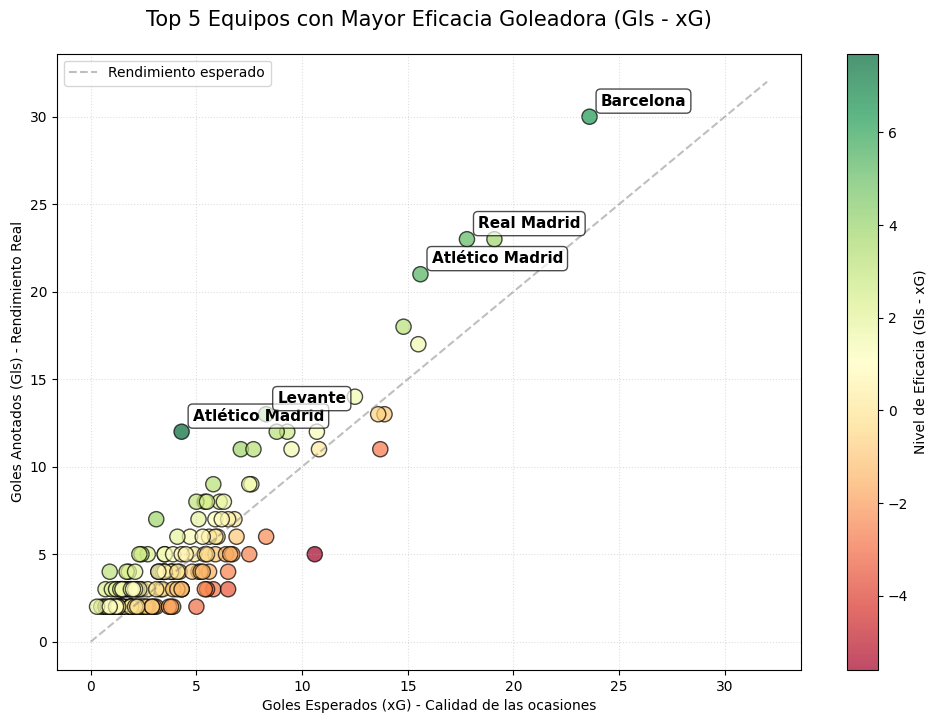

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Identificación de las columnas correctas
col_g = 'Gls' if 'Gls' in df.columns else 'Gls_sum'
col_xg = 'xG' if 'xG' in df.columns else 'xG_sum'

# 2. Filtramos y calculamos la diferencia (Eficacia)
df_plot = df[df[col_g] > 1].copy()
df_plot['diff'] = df_plot[col_g] - df_plot[col_xg]

# 3. Configuración del Scatter Plot
plt.figure(figsize=(12, 8))
x = df_plot[col_xg]
y = df_plot[col_g]

# Dimensión 3: Color basado en la eficacia
scatter = plt.scatter(
    x,
    y,
    c=df_plot['diff'],
    cmap='RdYlGn',
    s=120,
    alpha=0.7,
    edgecolors='black'
)

# 4. Línea de referencia (Diagonal x=y)
lims = [0, max(x.max(), y.max()) + 2]
plt.plot(lims, lims, color='gray', linestyle='--', alpha=0.5, label='Rendimiento esperado')

# 5. ETIQUETAS: Seleccionamos el TOP 5 más eficaces
top_5_eficaces = df_plot.sort_values(by='diff', ascending=False).head(5)

for i, row in top_5_eficaces.iterrows():
    plt.annotate(
        row['Squad'],
        (row[col_xg], row[col_g]),
        fontsize=11,
        fontweight='bold',
        xytext=(8, 8),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7, ec='black')
    )

# Personalización estética
plt.title("Top 5 Equipos con Mayor Eficacia Goleadora (Gls - xG)", fontsize=15, pad=20)
plt.xlabel("Goles Esperados (xG) - Calidad de las ocasiones")
plt.ylabel("Goles Anotados (Gls) - Rendimiento Real")
plt.colorbar(scatter, label='Nivel de Eficacia (Gls - xG)')
plt.legend(loc='upper left')
plt.grid(True, linestyle=':', alpha=0.4)

plt.show()


### **Conclusiones del Análisis de Eficacia Goleadora**
**1. Identificación de la Élite de Finalización**
El análisis permite distinguir claramente a los equipos que poseen un talento diferencial en el área rival. En la gráfica, el Barcelona, Real Madrid y Atlético de Madrid no solo destacan por el volumen de ocasiones generadas (eje X), sino por su capacidad para "romper" la estadística. Esto indica que cuentan con jugadores capaces de marcar goles en situaciones donde el modelo matemático de xG asigna una probabilidad muy baja de éxito.

**2. El Caso del Levante: Eficacia sobre Volumen**
Un hallazgo relevante de este estudio es el posicionamiento del Levante. A diferencia de los equipos de la zona alta de la tabla, su volumen de xG es moderado. Sin embargo, su ubicación por encima de la línea diagonal y su color verde indican que su productividad real es extremadamente alta en comparación con la calidad de sus tiros. Esto sugiere una fase de finalización clínica o una racha de acierto muy superior a la media de la liga.

**3. Aplicación Práctica en el Scouting y Dirección Técnica***
Este tipo de herramientas visuales son fundamentales para la toma de decisiones en el fútbol moderno:

Evaluación de Delanteros: Permite identificar si un jugador está marcando por mérito propio (finalización de calidad) o simplemente por estar en un sistema que genera muchas ocasiones fáciles.

Detección de "Malas Rachas": Los equipos que aparecen en las zonas rojas del gráfico (mucho xG pero pocos goles) no necesitan necesariamente cambiar su forma de jugar, sino mejorar la confianza o la calidad de sus rematadores, ya que el sistema de juego sí está creando el peligro esperado.

Estrategia Defensiva: Ayuda a los analistas a identificar qué equipos rivales son más peligrosos "con poco", alertando sobre la necesidad de no conceder ni un solo metro a equipos con alta tasa de conversión como los identificados en el Top 5.

**4. Limitaciones del Modelo**
Es importante señalar que, aunque el xG es la mejor métrica disponible para medir la calidad del juego, no tiene en cuenta la identidad del rematador ni la posición exacta de los defensas en el momento del tiro. Por ello, la diferencia positiva (Gls - xG) es el mejor indicador para valorar el factor humano y el talento individual sobre el campo.

## **5. Visualización avanzada de datos mediante gráfico de radar**

Se ha realizado un gráfico de radar para comparar el rendimiento ofensivo de tres delanteros a partir de métricas por 90 minutos. Las variables han sido normalizadas mediante el método min–max utilizando el conjunto completo de jugadores, lo que permite una comparación homogénea entre perfiles de finalización y creación.

In [98]:
# -----------------------------
# 1. Métricas a usar en el radar
# -----------------------------
metrics = ['Gls/90', 'Ast/90', 'xG/90', 'xA/90', 'npxG/90', 'npxG+xA/90']

# -----------------------------
# 2. Jugadores a comparar
# -----------------------------
player_1 = "Karim Benzema"
player_2 = "Luis Suárez"
player_3 = "Lionel Messi"

players = [player_1, player_2, player_3]

# -----------------------------
# 3. Filtrado del DataFrame
# -----------------------------
df_radar = df.loc[df['Player'].isin(players), ['Player'] + metrics].copy()

# Conversión a numérico por seguridad
for m in metrics:
    df_radar[m] = pd.to_numeric(df_radar[m], errors='coerce')

# Eliminamos filas con NaN
df_radar = df_radar.dropna()

# Comprobación visual
df_radar


,Player,Gls/90,Ast/90,xG/90,xA/90,npxG/90,npxG+xA/90
55,Karim Benzema,0.72,0.28,0.55,0.19,0.53,0.72
344,Lionel Messi,0.89,0.27,0.70,0.32,0.58,0.90
523,Luis Suárez,0.75,0.11,0.56,0.12,0.48,0.59


In [99]:
# ------------------------------------------------
# 4. Normalización min-max usando TODO el dataset
# ------------------------------------------------
df_norm = df.copy()

for m in metrics:
    df_norm[m] = pd.to_numeric(df_norm[m], errors='coerce')

df_norm = df_norm.dropna(subset=metrics)

# Cálculo de mínimos y máximos por métrica
min_vals = df_norm[metrics].min()
max_vals = df_norm[metrics].max()

# Aplicamos la normalización a los jugadores seleccionados
df_radar_norm = df_radar.copy()

for m in metrics:
    df_radar_norm[m] = (df_radar_norm[m] - min_vals[m]) / (max_vals[m] - min_vals[m])

# Comprobación visual
df_radar_norm


,Player,Gls/90,Ast/90,xG/90,xA/90,npxG/90,npxG+xA/90
55,Karim Benzema,0.351220,0.093333,0.317919,0.283582,0.306358,0.324324
344,Lionel Messi,0.434146,0.090000,0.404624,0.477612,0.335260,0.405405
523,Luis Suárez,0.365854,0.036667,0.323699,0.179104,0.277457,0.265766


In [100]:
# -----------------------------------
# 5. Preparación de datos del radar
# -----------------------------------
values_1 = df_radar_norm.loc[df_radar_norm['Player'] == player_1, metrics].values.flatten().tolist()
values_2 = df_radar_norm.loc[df_radar_norm['Player'] == player_2, metrics].values.flatten().tolist()
values_3 = df_radar_norm.loc[df_radar_norm['Player'] == player_3, metrics].values.flatten().tolist()

# Cerramos el radar (repetimos el primer valor)
values_1 += values_1[:1]
values_2 += values_2[:1]
values_3 += values_3[:1]

# Ángulos del radar
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]


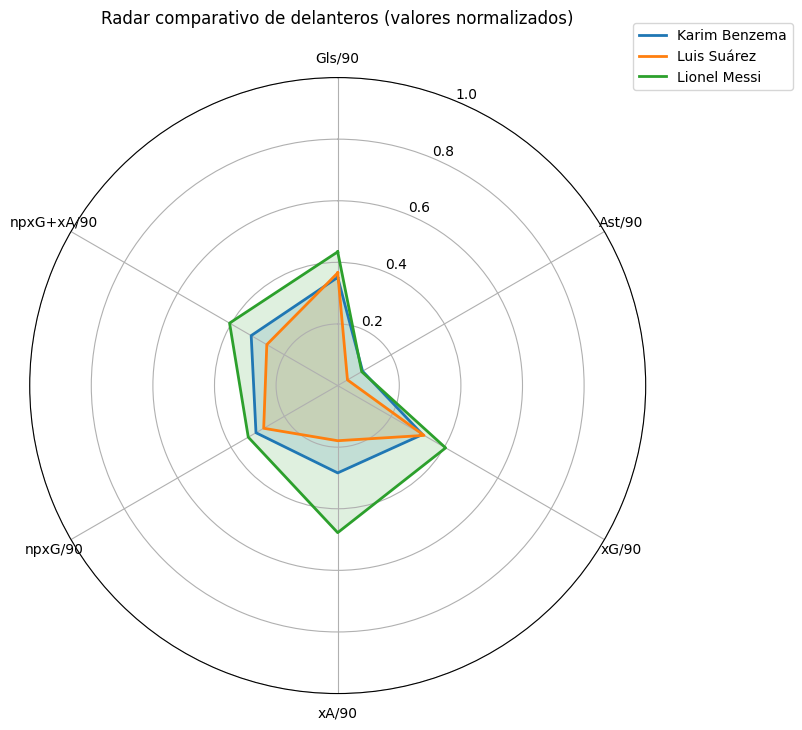

In [101]:
# -----------------------------
# 6. Creación del gráfico radar
# -----------------------------
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Configuración del eje polar
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Etiquetas de las métricas
plt.xticks(angles[:-1], metrics)

# Rango normalizado
ax.set_ylim(0, 1)

# Dibujamos cada jugador
ax.plot(angles, values_1, linewidth=2, label=player_1)
ax.fill(angles, values_1, alpha=0.15)

ax.plot(angles, values_2, linewidth=2, label=player_2)
ax.fill(angles, values_2, alpha=0.15)

ax.plot(angles, values_3, linewidth=2, label=player_3)
ax.fill(angles, values_3, alpha=0.15)

# Título y leyenda
plt.title("Radar comparativo de delanteros (valores normalizados)", pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1))

plt.show()


### **Análisis final del gráfico de radar**

El gráfico de radar presenta una comparación del rendimiento ofensivo de Karim Benzema, Luis Suárez y Lionel Messi utilizando métricas por 90 minutos normalizadas mediante el método min–max. Esta normalización permite analizar de forma homogénea perfiles con roles ofensivos diferentes, evitando sesgos derivados del volumen de minutos o del contexto colectivo.

- Los resultados muestran a **Lionel Messi** como el perfil más completo, destacando especialmente en métricas creativas y de generación de juego (Ast/90, xA/90 y npxG+xA/90), además de mantener valores elevados en finalización (Gls/90 y xG/90). Su radar presenta una superficie más amplia, lo que indica una mayor contribución ofensiva global.

- **Karim Benzema** muestra un perfil equilibrado entre generación y finalización, con valores consistentes en xG/90 y npxG/90, lo que refleja su capacidad para producir ocasiones de calidad y participar activamente en el juego ofensivo colectivo. Su radar evidencia un rol de delantero asociativo, con impacto tanto en la creación como en la definición.

- Por su parte, **Luis Suárez** presenta un perfil más orientado a la finalización, con menor peso en métricas creativas (Ast/90 y xA/90), pero manteniendo un rendimiento sólido en goles y xG por 90 minutos. Esto refleja un rol más específico de rematador y presencia en el área.

En conjunto, el gráfico permite identificar claramente las diferencias de rol y estilo entre los tres delanteros, mostrando cómo métricas avanzadas por 90 minutos ofrecen una visión más profunda del rendimiento ofensivo que los valores absolutos de goles.